Most of the following code is taken from the following tutorial

Ref:-https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [10]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [11]:
malwarelist=np.genfromtxt('../Dataset/hybrid/final/all_final_35.csv',delimiter=",",dtype=str)

X = malwarelist[:,0:-2]

y = malwarelist[:,-1]

Assigning names to their fields

In [12]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)

df['y'] = y

df['label'] = df['y'].apply(lambda i: str(i))

df['lb'] = y.astype(int)
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (10868, 38)


Implementing PCA

In [13]:
pca = PCA(n_components=8)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29524207 0.22055361 0.14208426 0.11672285 0.07514171 0.05756878
 0.04585467 0.00974895]


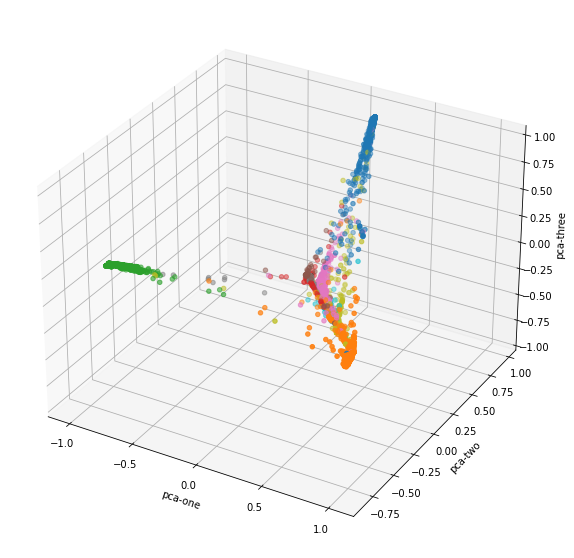

In [14]:
rndperm = np.random.permutation(df.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["lb"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

Plotting graph using two PCA components

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

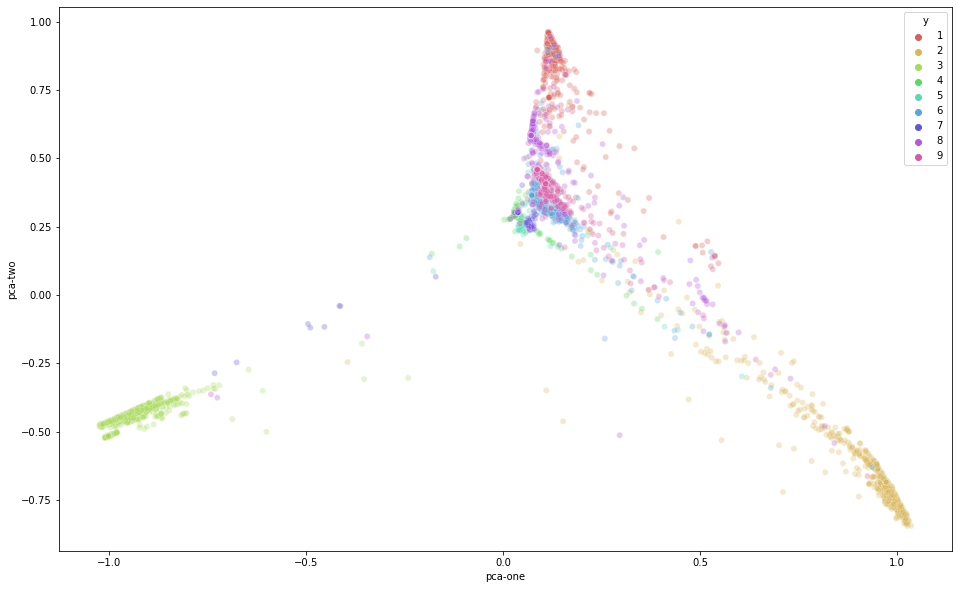

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3
)

Copying data

In [16]:
df_copy = df.copy()
data_set = df_copy[feat_cols].values
pca = PCA(n_components=8)
pca_result = pca.fit_transform(data_set)
df_copy['pca-one'] = pca_result[:,0]
df_copy['pca-two'] = pca_result[:,1] 
df_copy['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29524207 0.22055361 0.14208426 0.11672285 0.07514171 0.05756878
 0.04585467 0.00974895]


Applying t-SNE fro data visualization

In [17]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_set)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10868 samples in 0.101s...
[t-SNE] Computed neighbors for 10868 samples in 2.167s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10868
[t-SNE] Computed conditional probabilities for sample 2000 / 10868
[t-SNE] Computed conditional probabilities for sample 3000 / 10868
[t-SNE] Computed conditional probabilities for sample 4000 / 10868
[t-SNE] Computed conditional probabilities for sample 5000 / 10868
[t-SNE] Computed conditional probabilities for sample 6000 / 10868
[t-SNE] Computed conditional probabilities for sample 7000 / 10868
[t-SNE] Computed conditional probabilities for sample 8000 / 10868
[t-SNE] Computed conditional probabilities for sample 9000 / 10868
[t-SNE] Computed conditional probabilities for sample 10000 / 10868
[t-SNE] Computed conditional probabilities for sample 10868 / 10868
[t-SNE] Mean sigma: 0.000936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.203857
[t-SNE] KL

Plotting t-SNE graph using two component

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

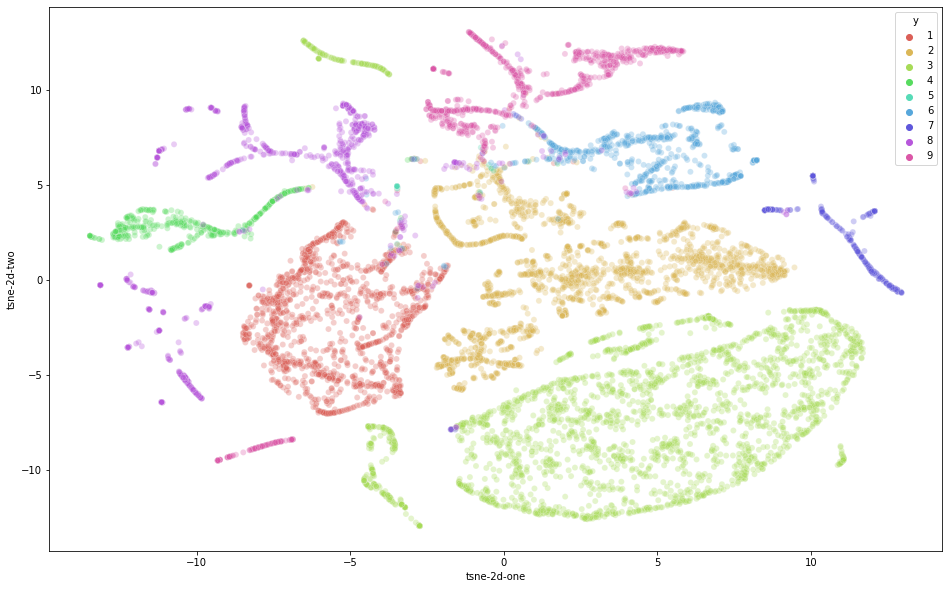

In [18]:
df_copy['tsne-2d-one'] = tsne_results[:,0]
df_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 9),
    data=df_copy,
    legend="full",
    alpha=0.3
)